In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
spam_df = pd.read_csv('emails.csv')

In [6]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [12]:
ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

In [14]:
ham.shape

(4360, 2)

In [16]:
spam.shape

(1368, 2)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [22]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
spamham_countvectorizer.shape

(5728, 37303)

In [26]:
labels = spam_df['spam'].values
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, labels)

MultinomialNB()

In [34]:
testing_sample = ['Free money!!', 'Hi Jhon, How are you?']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [40]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [44]:
X = spamham_countvectorizer
y = labels

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

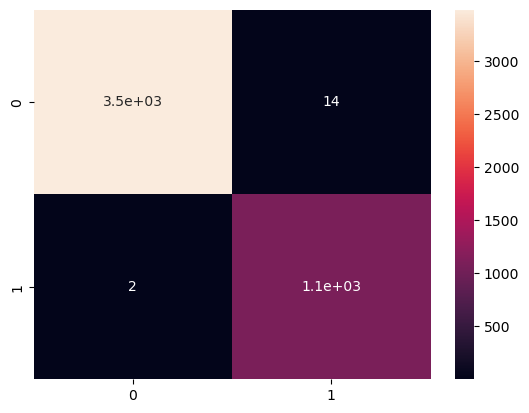

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

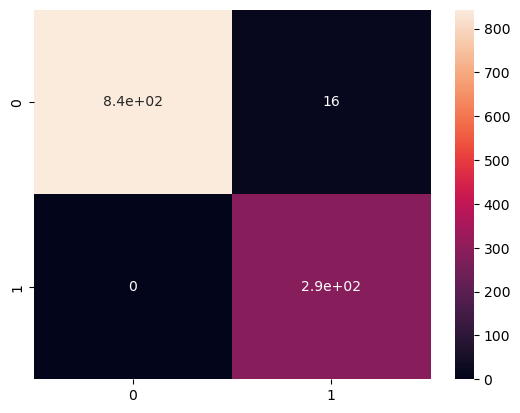

In [52]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [56]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       859
           1       0.95      1.00      0.97       287

    accuracy                           0.99      1146
   macro avg       0.97      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

